# Report 02
### Yuzhong Huang

## Quiz problem

Two identical twins are members of my chess club, but they never show up on the same day; in fact, they strictly alternate the days they show up.  I can't tell them apart except that one is a better player than the other:  Avery beats me 60% of the time and I beat Blake 70% of the time.  If I play one twin on Monday and win, and the other twin on Tuesday and lose, which twin did I play on which day?

#### My solution follows. 

Since the twins strictly alternate the days they show up and I can't tell them apart. There are two hypothesis here: I played Avery on Monday and Blake on Tuesday; I played Blake on Monday and Avwey on Tuesday. We know that Avery beats me 60% of the time and I beat Blake 70% of the time. Applying the table method, we got:

|    | Prior P(H) | Likelihood P(D/H) | P(H)P(D/H) | Posterior P(H/D) |
|----|------------|-------------------|------------|------------------|
| H1 | 1/2        | (70)(60)          | 4200       | 7/9              |
| H2 | 1/2        | (30)(40)          | 1200       | 2/9              |

Therefore, I have a chance of (7/9) that I played Blake on Monday and Avwey on Tuesday, and (2/9) that I played Avery on Monday and Blake on Tuesday.

## Problems from other source

Most (80%) of the taxis in Simpletown are green, with the rest (20%) being yellow. In a traffic accident involving a hit-and-run taxi, a witness claims the taxi was yellow. Careful testing shows that the witness can successfully identify the colour of a taxi only 75% of the time due to bad eyesight. On the balance of probabilities, should we hold Yellow Taxi Company liable? (From http://sydney.edu.au/ Comp4044 Course materials)

#### My solution follows

Since Most (80%) of the taxis in Simpletown are green, with the rest (20%) being yellow. There are two hypothesis in thie problem: The hit-and-run taxi is yellow; the hit-and-run taxi is green. We know that the witness can successfully identify the colour of a taxi only 75% of the time due to bad eyesight. Applying the table method, we got:

|    | Prior P(H) | Likelihood P(D/H) | P(H)P(D/H) | Posterior P(H/D) |
|----|------------|-------------------|------------|------------------|
| H1 | 1/5        | 75                | 15         | 3/7              |
| H2 | 4/5        | 25                | 20         | 4/7              |

Therefore, it has a chance of (3/7) that the hit-and-run taxi is yellow, and (4/7) that it is green. (This question reminds me of the Oliver's blood problem) 

## Originaly questions

#### Type 1

There are 3 students in the class: A, B and C. Everyone independently picks a random number between 1 and 10(including both ends). What's the probablity that C's number is between A's and B's(not including both ends).

#### My solution follows

Since we want to calculate the probablity that C's number is between A's and B's(not including both ends), it is necessary that we first calculate the chance that A's, B's and C's number are different(if there is at least one pair of same number, the condition cannot be achieved). 

The probablity that their numbers are different is equal to possiblity of combinations of three different numbers divided by the total possible combinations. By doing that, we got:

P = (10 \* 9 \* 8) / (10 \* 10 \* 10) = 0.72

Under the condition that it has 0.72 of chance that their numbers are different. We have 6 different possible arrangement of their numbers. Namely:

A>B>C; B>A>C; A>C>B; B>C>A; A>C>B; C>A>B; C>B>A;

Since the situation are symmetrical here, the chance that C's number is between A's and B's under the condition that their numbers are different is 1/3.Therefore, the probablity that C's number is between A's and B's(not including both ends) is 0.72 * (1/3) = 0.24

#### Type 2

There are two huge buildings of the same type(total number of appartment is the same and large enough). Each appartment in the buildings has only one window. People living there always turn the lights on during the night. By randomly choosing 50 windows, we find that there are 34 windows with lights on building 1; 18 out of 30 on building 2. What's the chance that there are more people in building 1 than in building 2?

#### My solution follows

Let's define the density of the building is (# apartment that lives people) / (# total appartment), ranging from 0 to 1. Since building 1 and building 2 are of the same type. The chance that there are more people in building 1 than in building 2, is same as the chance that the density of building 1 is larger than building 2.

Next we will use Beta distribution to model the densities of both buildings and update them with collected data. To do this, we will first import the library we are going to use.

In [1]:
from __future__ import print_function, division

import numpy as np

import thinkbayes2
from thinkbayes2 import Pmf, Cdf, Suite
import thinkplot

% matplotlib inline

And define the Beta class that we used to model the densities. 

In [2]:
from scipy import special

class Beta:
    """Represents a Beta distribution.

    See http://en.wikipedia.org/wiki/Beta_distribution
    """
    def __init__(self, alpha=1, beta=1, label=None):
        """Initializes a Beta distribution."""
        self.alpha = alpha
        self.beta = beta
        self.label = label if label is not None else '_nolegend_'

    def Update(self, data):
        """Updates a Beta distribution.

        data: pair of int (heads, tails)
        """
        heads, tails = data
        self.alpha += heads
        self.beta += tails

    def Mean(self):
        """Computes the mean of this distribution."""
        return self.alpha / (self.alpha + self.beta)

    def MAP(self):
        """Computes the value with maximum a posteori probability."""
        a = self.alpha - 1
        b = self.beta - 1
        return a / (a + b)

    def Random(self):
        """Generates a random variate from this distribution."""
        return random.betavariate(self.alpha, self.beta)

    def Sample(self, n):
        """Generates a random sample from this distribution.

        n: int sample size
        """
        size = n,
        return np.random.beta(self.alpha, self.beta, size)

    def EvalPdf(self, x):
        """Evaluates the PDF at x."""
        return x ** (self.alpha - 1) * (1 - x) ** (self.beta - 1)

    def MakePmf(self, steps=101, label=None):
        """Returns a Pmf of this distribution.

        Note: Normally, we just evaluate the PDF at a sequence
        of points and treat the probability density as a probability
        mass.

        But if alpha or beta is less than one, we have to be
        more careful because the PDF goes to infinity at x=0
        and x=1.  In that case we evaluate the CDF and compute
        differences.

        The result is a little funny, because the values at 0 and 1
        are not symmetric.  Nevertheless, it is a reasonable discrete
        model of the continuous distribution, and behaves well as
        the number of values increases.
        """
        if label is None and self.label is not None:
            label = self.label

        if self.alpha < 1 or self.beta < 1:
            cdf = self.MakeCdf()
            pmf = cdf.MakePmf()
            return pmf

        xs = [i / (steps - 1) for i in range(steps)]
        probs = [self.EvalPdf(x) for x in xs]
        pmf = Pmf(dict(zip(xs, probs)), label=label)
        return pmf

    def MakeCdf(self, steps=101):
        """Returns the CDF of this distribution."""
        xs = [i / (steps - 1) for i in range(steps)]
        ps = special.betainc(self.alpha, self.beta, xs)
        cdf = Cdf(xs, ps)
        return cdf

    def Percentile(self, ps):
        """Returns the given percentiles from this distribution.

        ps: scalar, array, or list of [0-100]
        """
        ps = np.asarray(ps) / 100
        xs = special.betaincinv(self.alpha, self.beta, ps)
        return xs

We will first start with a uniform distibution.

In [7]:
# Here's a uniform Beta distribution that represents building 1's
# density

b1 = Beta(1, 1, label='building 1')
b1.Update((34, 16))

# Here's a uniform Beta distribution that represents building 2's
# density

b2 = Beta(1, 1, label='building 2')
b2.Update((18, 12))

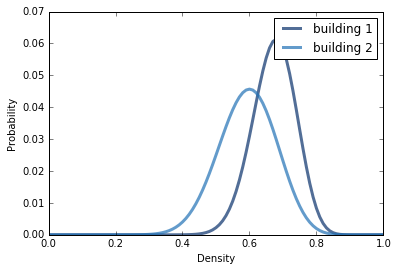

In [8]:
# Here's what the posteriors look like

thinkplot.Pdf(b1.MakePmf())
thinkplot.Pdf(b2.MakePmf())
thinkplot.Config(xlabel='Density', ylabel='Probability')

In [13]:
# To estimate the probability of superiority, we can
# draw samples from the posteriors and compare them

b1_sample = b1.MakeCdf(10001).Sample(10000)
b2_sample = b2.MakeCdf(10001).Sample(10000)
np.mean(b1_sample > b2_sample)

0.76739999999999997

From the above models, bulding has around 77% chance to have a larger density than building 2. Now suppose that we add some assumption to our initial model: It's more likely that the density is around the center than it is around the two edges, and it's not possible that there is no people or no empty apartment at all in the building. Then we will choose a beta distribution that has higher probablity around 0.5, smaller value near the edge and the probablity for 0 and 1 is 0.

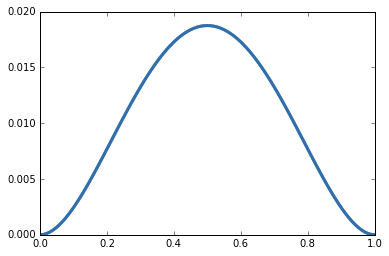

In [16]:
# Here's a Beta distribution that represents building 1's
# density

b1 = Beta(3, 3, label='building 1')
thinkplot.Pdf(b1.MakePmf())

# Here's a Beta distribution that represents building 2's
# density

b2 = Beta(3, 3, label='building 2')
thinkplot.Pdf(b2.MakePmf())

# Since both building have the same initial model, their pmf will overlap 

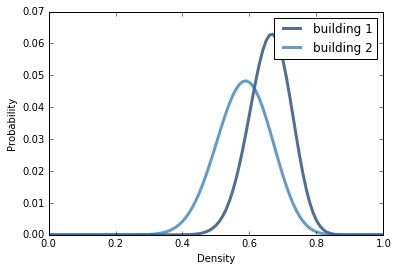

In [17]:
# We then update the new model and plot the updated model's posteriors
b1.Update((34, 16))
b2.Update((18, 12))

thinkplot.Pdf(b1.MakePmf())
thinkplot.Pdf(b2.MakePmf())
thinkplot.Config(xlabel='Density', ylabel='Probability')

In [22]:
# To estimate the probability of superiority, we can
# draw samples from the posteriors and compare them

b1_sample = b1.MakeCdf(10001).Sample(10000)
b2_sample = b2.MakeCdf(10001).Sample(10000)
np.mean(b1_sample > b2_sample)

0.77559999999999996

As we can see, even if we change the initial model, the result is not too far away from the previous model's outcome. Building 1 still have around 77% chance to have a larger density.